In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("results_cpu_core_experiment.csv")
# clear the data
df["param_agent0_cmdstart"] = df.param_agent0_cmdstart.str.replace("tcpreplay -i data -tK --loop 1000 --preload-pcap /pcaps/", "")
df["param_vnf0_cmdstart"] = df.param_vnf0_cmdstart.str.replace("./start.sh ", "")
# convert metrics
df['cpu_core_count'] = df.param_vnf0_cpuset.str.count(',') + 1

print("Columns: {}".format(list(df)))

Columns: ['Unnamed: 0', 'metric_vnf0_eth_input_rx_bytes', 'metric_vnf0_suricata_bytes', 'metric_vnf0_suricata_dropped', 'metric_vnf0_suricata_drops', 'metric_vnf0_suricata_packets', 'param_vnf0_cmdstart', 'param_vnf0_cpubw', 'param_vnf0_cpuset', 'param_vnf0_memmax', 'param_agent0_cmdstart', 'param_repetition', 'param_exptimelimit', 'cpu_core_count']


## Suricate performance over no. vCPU cores 

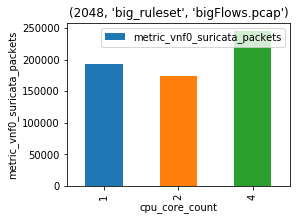

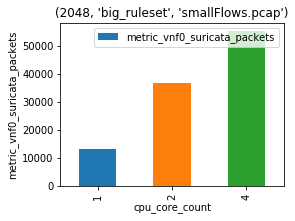

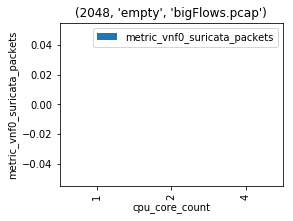

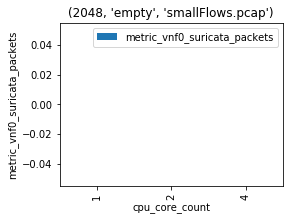

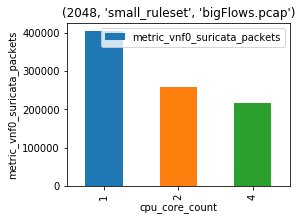

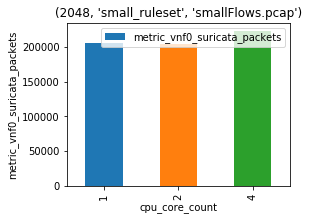

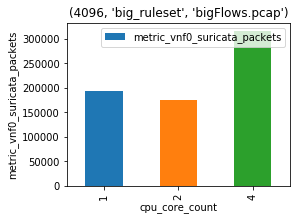

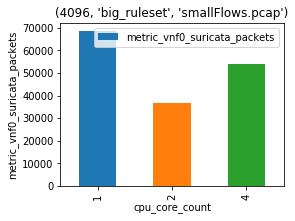

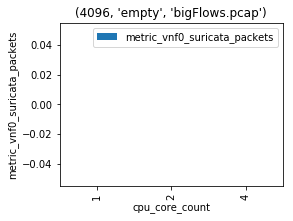

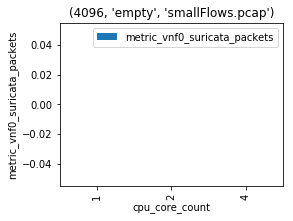

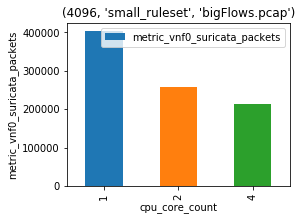

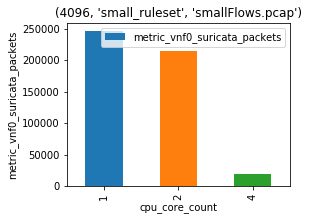

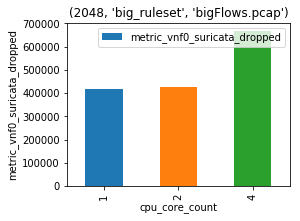

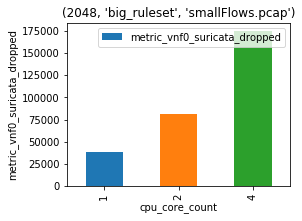

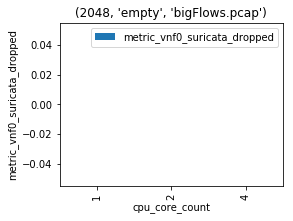

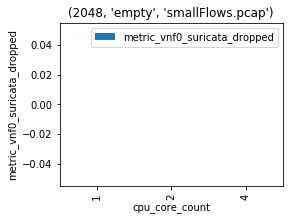

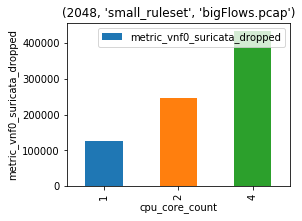

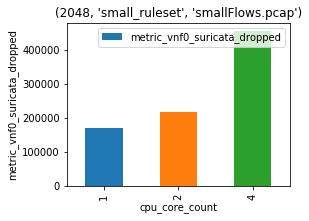

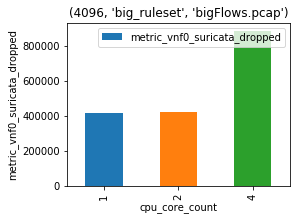

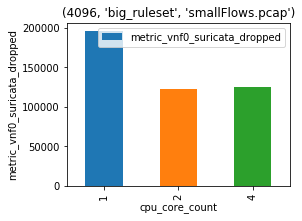

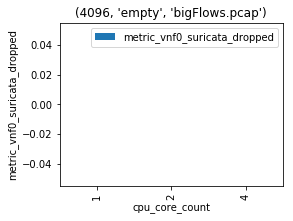

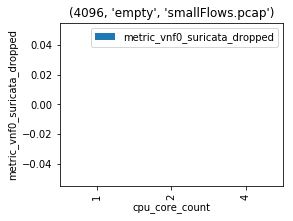

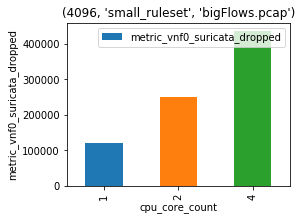

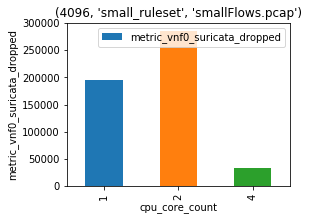

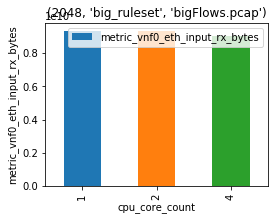

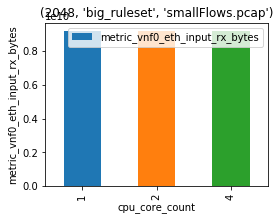

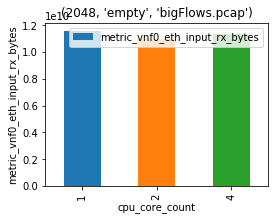

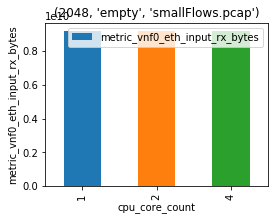

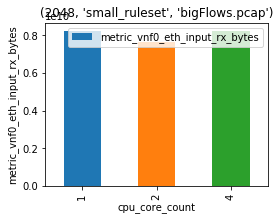

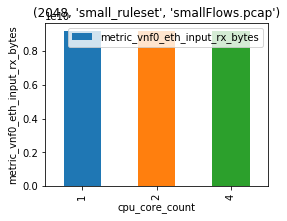

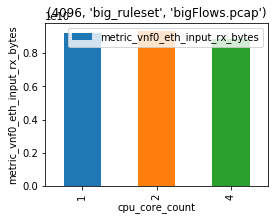

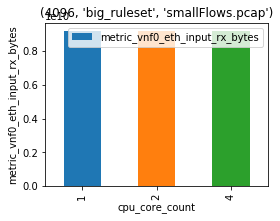

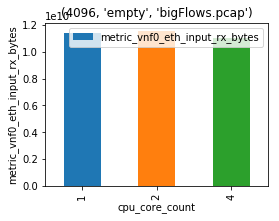

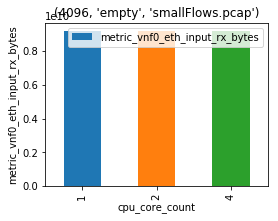

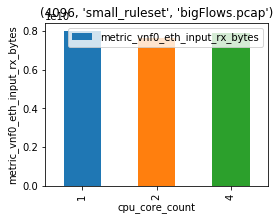

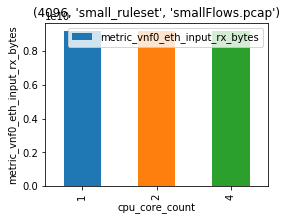

In [15]:
metrics = [
    "metric_vnf0_suricata_packets",
    #"metric_vnf0_suricata_bytes",
    "metric_vnf0_suricata_dropped",
    #"metric_vnf0_suricata_drops",
    "metric_vnf0_eth_input_rx_bytes"
]

# group data for multiple plots
df_grp = df.groupby(['param_vnf0_memmax','param_vnf0_cmdstart', 'param_agent0_cmdstart'])

for metric in metrics:
    for (gname, gdata) in df_grp:
        ax = gdata.plot(x="cpu_core_count", y=metric, kind="bar", title=str(gname), figsize=(4,3))
        ax.set_ylabel(metric)

## Suricata performance over CPU bandwidth

In [16]:
df = pd.read_csv("results_cpu_bw_experiment.csv")
# clear the data
df["param_agent0_cmdstart"] = df.param_agent0_cmdstart.str.replace("tcpreplay -i data -tK --loop 1000 --preload-pcap /pcaps/", "")
df["param_vnf0_cmdstart"] = df.param_vnf0_cmdstart.str.replace("./start.sh ", "")
#print("Columns: {}".format(list(df)))
#df.info()

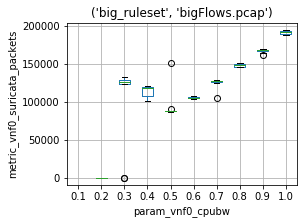

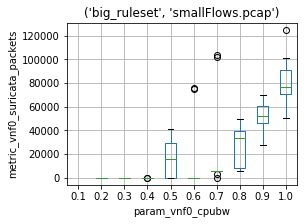

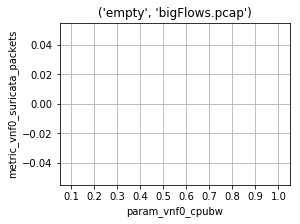

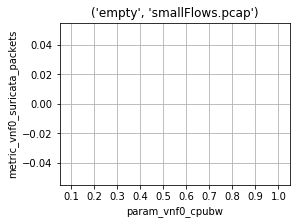

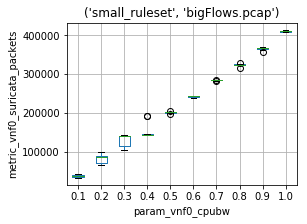

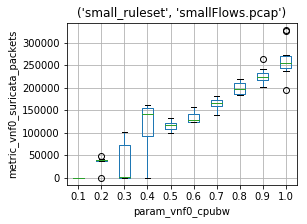

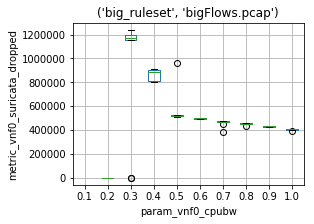

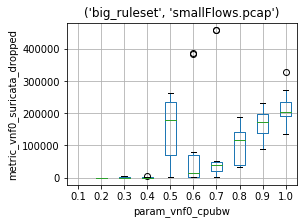

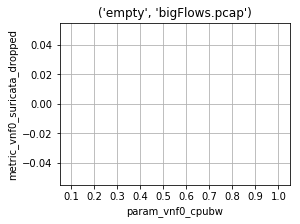

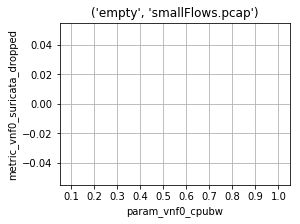

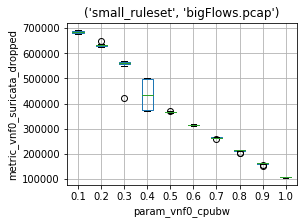

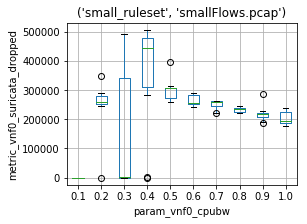

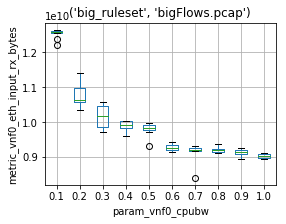

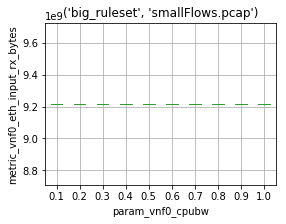

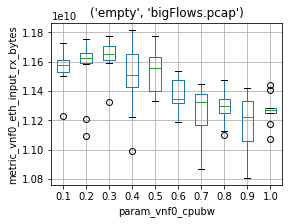

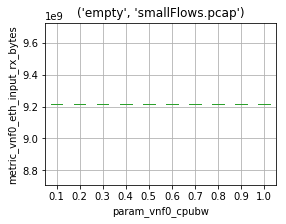

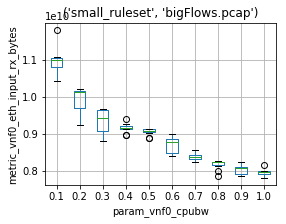

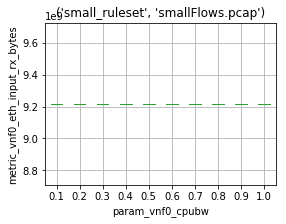

In [17]:
metrics = [
    "metric_vnf0_suricata_packets",
    #"metric_vnf0_suricata_bytes",
    "metric_vnf0_suricata_dropped",
    #"metric_vnf0_suricata_drops",
    "metric_vnf0_eth_input_rx_bytes"
]

# group data for multiple plots
df_grp = df.groupby(['param_vnf0_cmdstart', 'param_agent0_cmdstart'])

for metric in metrics:
    for (gname, gdata) in df_grp:
        ax = gdata.boxplot(by="param_vnf0_cpubw", column=metric, figsize=(4,3))
        ax.set_ylabel(metric)
        ax.set_title(str(gname))
        plt.suptitle("")